<a href="https://colab.research.google.com/github/jesuspena91/Test591Git/blob/master/Homework_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 0: Getting Started (10 points)

For this initial assignment, our primary goal is to familiarize you with the Jupyter/Python and Apache Spark "software stack" we will use through the semester.

**This class assumes you are comfortable programming in Python.**

We will be using **Google Colab** to do the majority of work in the class, since it offers a standard environment regardless of your personal machine. This very file is a Jupyter **notebook** that you can edit and use to run Python code. Its file extension is “.ipynb” for (I)nteractive (Py)thon (N)ote(b)ook. 

Notebooks are divided into Cells. Some Cells are text (written in Markdown). You won’t need to edit these. The other Cells are executable code and will have `[ ]` to the left of them. After running one of these Cells, a number will appear inside the brackets, indicating the order in which the Cells were run.


<br>

#### **Please make a COPY of this notebook!**

Please make a COPY of this notebook when you are getting started; nobody should have edit privileges which means that while you can type and run cells here, **it will NOT save**. Make a copy to your own Colab!

# Part 1: Cloud Environment Setup

If you've gotten to this point, you have already successfully logged into Google Colab!  Most likely you'll want to ``Save a Copy in Drive`` for your own use as you edit your code.  We suggest you don't rename the file as you do so.

Since this initial homework uses the whole "big data" stack, including Apache Spark, we will first need to do some software setup.

Generally speaking we will be running command-line options (eg to install software on the host machine) using the `!` operation, and we will be using `pip` to install Python libraries.



## 1.1 Installing Spark on Google Colab

To install Apache Spark, we'll need to actually install the **Kerberos** security package as well as the **Pyspark** libraries...  Then we'll install Apache Spark itself.  You don't need to fully follow the details here, but you do need to execute the cell!

Select it and hit [Shift]-[Enter] to run, or click on the "play" triangle to the left.

In [ ]:
## Let's install Apache Spark on Colab

!wget https://downloads.apache.org/spark/spark-3.1.2/spark-3.1.2-bin-hadoop3.2.tgz
!tar xf spark-3.1.2-bin-hadoop3.2.tgz
!pip install findspark

import os

os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop3.2"

--2021-08-17 16:00:22--  https://downloads.apache.org/spark/spark-3.1.2/spark-3.1.2-bin-hadoop3.2.tgz
Resolving downloads.apache.org (downloads.apache.org)... 135.181.214.104, 135.181.209.10, 88.99.95.219, ...
Connecting to downloads.apache.org (downloads.apache.org)|135.181.214.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228834641 (218M) [application/x-gzip]
Saving to: ‘spark-3.1.2-bin-hadoop3.2.tgz’

spark-3.1.2-bin-had 100%[===================>] 218.23M  10.8MB/s    in 23s     

2021-08-17 16:00:46 (9.61 MB/s) - ‘spark-3.1.2-bin-hadoop3.2.tgz’ saved [228834641/228834641]



Good, the software should be installed.

Now you need to run three more Cells that configure Jupyter for Apache Spark, set up the environment, and connect to Spark.

In [ ]:
import findspark

findspark.init()

import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import pyspark.sql.functions as F
from pyspark.sql import SQLContext

In [ ]:
try:
    if(spark == None):
        spark = SparkSession.builder.appName('Initial').getOrCreate()
        sqlContext=SQLContext(spark)
except NameError:
    spark = SparkSession.builder.appName('Initial').getOrCreate()
    sqlContext=SQLContext(spark)


## 1.2 Autograding and the PennGrader

<img align="right" src = "https://imgur.com/rNd3gIg.png" width= "200"/>

Next you'll need to set up the PennGrader, which we'll be using throughout the semester to help you with your homeworks.

PennGrader is not only **awesome**, but it was originally built by an equally awesome person: Penn Data Science Master's alumnus Leo Murri, who became a TA for this course.  Today Leo works as a data scientist at Amazon!

PennGrader was developed to provide students with *instant* feedback on their answer. You can submit your answer and know whether it's right or wrong instantly. We then record your most recent answer in our backend database.

In [ ]:
%%capture
!pip install penngrader


Let's try it out! Fill in the cell below with your 8-digit Penn ID and then run the following cell to initialize the grader.

In [ ]:
#PLEASE ENSURE YOUR PENN-ID IS ENTERED CORRECTLY. IF NOT, THE AUTOGRADER WON'T KNOW WHO 
#TO ASSIGN POINTS TO YOU IN OUR BACKEND
STUDENT_ID = 99999999 # YOUR PENN-ID GOES HERE AS AN INTEGER#

In [ ]:
import penngrader.grader

grader = penngrader.grader.PennGrader(homework_id = 'CIS545_MCITO_Fall_2021_HW0', student_id = STUDENT_ID)

PennGrader initialized with Student ID: 99999999

Make sure this correct or we will not be able to store your grade


# Part 2: Your First Big Data Analytics Notebook

The rest of the assignment will try to illustrate a few aspects of data analytics...  Don't be concerned if you don't yet know all of the operations, libraries, etc. because that's what we'll be covering soon!

## 2.1 A Simple Program to Read from the Web and Invoke Spark

The cell below uses the **Pandas** library to read a table from the given web page (the Wikipedia information on films in the year 2010).  The code loads this into a list of **DataFrame**s called `films_2010`.  We then pull the table at index 3, then do some simple **data wrangling** on `top_films` to set up the appropriate types.

Select the Cell below and then select the Run button which appeared over the brackets.

In [ ]:
!pip install money-parser

In [ ]:
import pandas as pd
from money_parser import price_dec

def extract_number(x):
  return round(price_dec(x) / 1000000, 2)

films_2010 = pd.read_html('https://en.wikipedia.org/wiki/2010_in_film')

top_films = films_2010[3]

top_films.set_index('Rank', inplace=True)

top_films['Revenue (millions)'] = top_films['Worldwide gross'].apply(extract_number)

top_films

,Title,Distributor,Worldwide gross,Revenue (millions)
Rank,,,,
1,Toy Story 3,Disney,"$1,066,969,703",1066.97
2,Alice in Wonderland,Disney,"$1,025,467,110",1025.47
3,Harry Potter and the Deathly Hallows - Part 1,Warner Bros.,"$976,536,918",976.54
4,Inception,Warner Bros.,"$826,137,188",826.14
5,Shrek Forever After,Paramount / DreamWorks,"$752,600,867",752.60
6,The Twilight Saga: Eclipse,Lionsgate,"$698,491,347",698.49
7,Iron Man 2,Paramount,"$623,933,331",623.93
8,Tangled,Disney,"$592,461,732",592.46
9,Despicable Me,Universal,"$543,113,985",543.11


Can we programmatically compute how many entries were scored as top films?

In [ ]:
# You can use the Python len() function on a dataframe to figure out how many rows!

# TODO: Update dataframe_length with your code here!
dataframe_length = 

In [ ]:
# Run this cell to submit to PennGrader!

grader.grade(test_case_id = 'length_test', answer = dataframe_length)

You earned 0/4 points.

But, don't worry you can re-submit and we will keep only your latest score.


Now we will copy the table over to **Apache Spark**, which is a big data engine capable of processing giant tables.

We will **query** the table to get top films from Disney.

In [ ]:
from pyspark.sql.types import *

# The 'schema' specifies the column names and data types
schema = StructType([StructField('Title', StringType(), nullable=True), \
            StructField('Distributor', StringType(), nullable=False), \
            StructField('Gross', StringType(), nullable=False), \
            StructField('Revenue_M', DecimalType(), nullable=False)])

# This loads a Pandas DataFrame into Apache Spark
top_films_spark = spark.createDataFrame(top_films, \
                                         schema=schema)

# Now use Spark to filter only those rows in Towne 100
disney_films = top_films_spark.filter(top_films_spark.Distributor == 'Disney')
display(disney_films.collect())

[Row(Title='Toy Story 3', Distributor='Disney', Gross='$1,066,969,703', Revenue_M=Decimal('1067')),
 Row(Title='Alice in Wonderland', Distributor='Disney', Gross='$1,025,467,110', Revenue_M=Decimal('1025')),
 Row(Title='Tangled', Distributor='Disney', Gross='$592,461,732', Revenue_M=Decimal('592'))]

Congratulations, you have just run a very simple Spark program!

## 2.2 Something a Little More Fun
Running the cell below will create a scatter plot. 

**Your task is to edit this cell such that:***

1. The text (which says “Big Data student”) should be replaced with your full name.
2. The number of values sampled should be 625, and you should  change the figure title to match.

4. The x-axis should be labeled “Index”.

You may run this cell repeatedly to see the output.

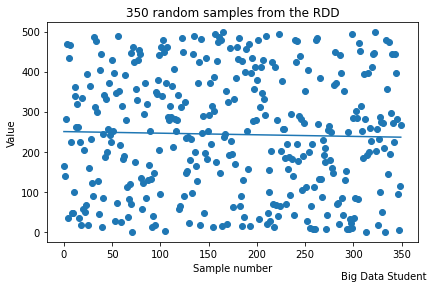

In [ ]:
# We’ll be using Matplotlib to plot a visualization
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

# Create a Spark dataset with values 0 thru 499
rdd = spark.sparkContext.parallelize(range(500))

# Sample 350 values from the RDD
y = np.array(rdd.takeSample(True, 350, 1))
# Create an array with the indices
x = np.array(range(len(y)))

# Create a plot with a caption, X and Y legends, etc
x_label = 'Sample number'
y_label = 'Value'
student = 'Big Data Student'

plt.title(str(len(y)) + ' random samples from the RDD')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.figtext(0.995, 0.01, student, ha='right', va='bottom')
# Scatter plot that fits within the box
plt.scatter(x, y)
plt.tight_layout()

# Now fit a trend line to the data and plot it over the scatter plot
m, c = np.polyfit(x, y, 1)
plt.plot(x, m*x + c)

# Save the SVG
plt.savefig('hw0.svg')

The following test cell prints your name and tests whether you followed the directions.

In [ ]:
print("Your name is:", student)

# Run this cell to submit to PennGrader!
grader.grade(test_case_id = 'name_test', answer = student)

Your name is: Big Data Student
You earned 0/4 points.

But, don't worry you can re-submit and we will keep only your latest score.


# Part 3: Submitting Your Homework

First, note that it's easy to "break" your notebook by changing something...  So you should *ALWAYS* clear output and re-run your code, just to make sure that hasn't happened.

When you are done, select the "Runtime" menu at the top of the window. Then, select "Restart and run all". Please make sure all cells complete!


## 3.1 Submission to Gradescope

1. Go to the File menu and choose "Download .ipynb". 
1. Access Gradescope through the Coursera Homework 0 page.
1. Upload `Homework_0.ipynb` from your `Downloads` directory.

You should be set!